# Polynomial Kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [2]:
data = pd.read_csv('polydata2.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]

In [3]:
def draw_svm(X, y, C=1.0):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', C=C)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

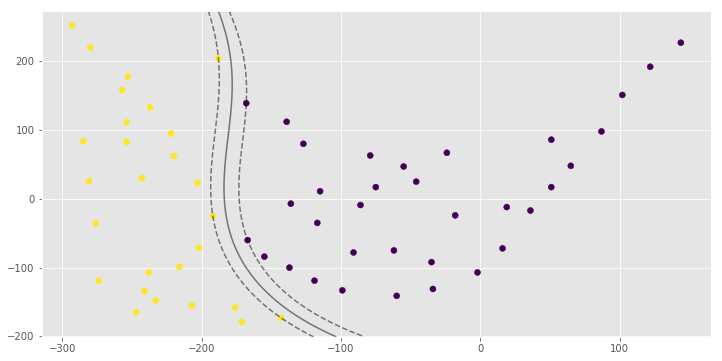

1.0
[0 1 0 1]


In [4]:
clf = draw_svm(X, y)
score = clf.score(X, y)
pred = clf.predict([(-130, 110), (-170, -160), (80, 90), (-280, 20)])
print(score)
print(pred)